<center>
<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
</center>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>
<center><b><h1>Meet Bagda - 102</b></center>    
<center><b><h1>22010101007</b></center>
<center><b><h1>Lab - 8</b></center>    
<pre>

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [150]:
df = pd.read_csv('./heart.csv')

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [153]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

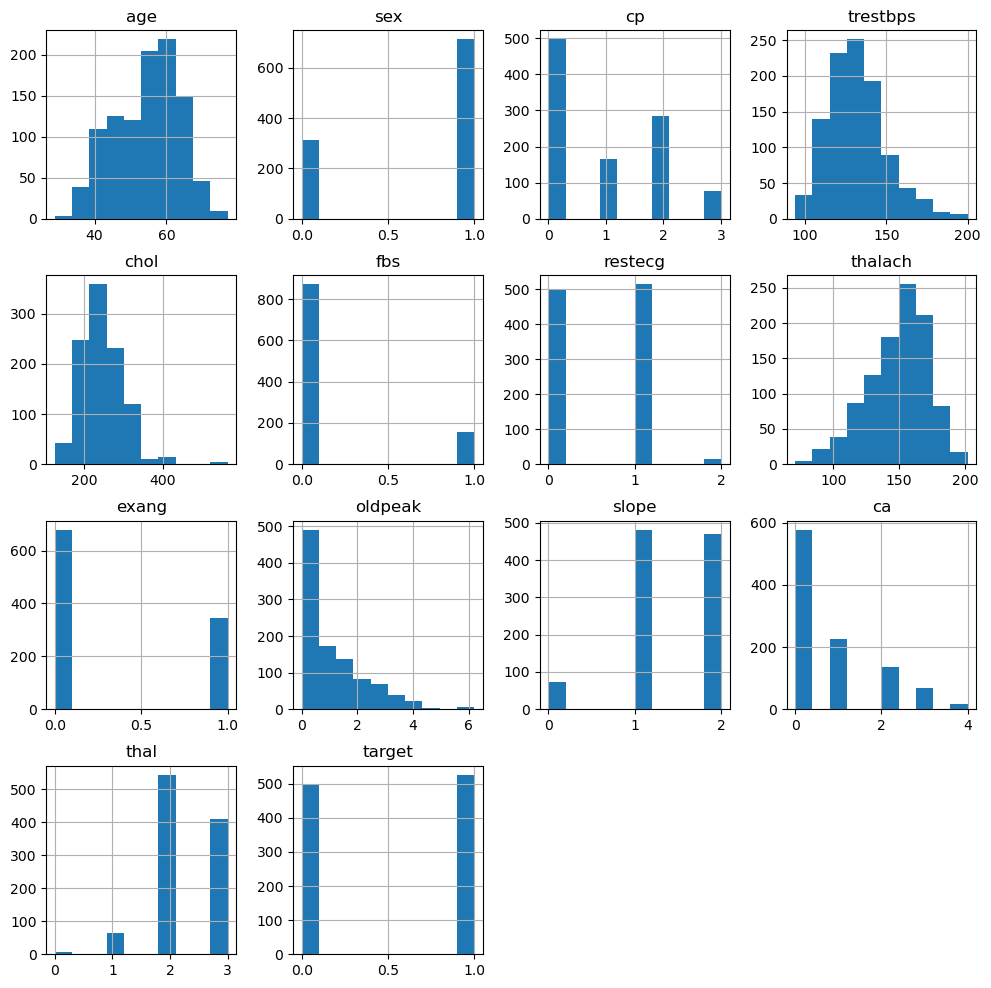

In [154]:
df.hist(figsize=(12,12))

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

In [155]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

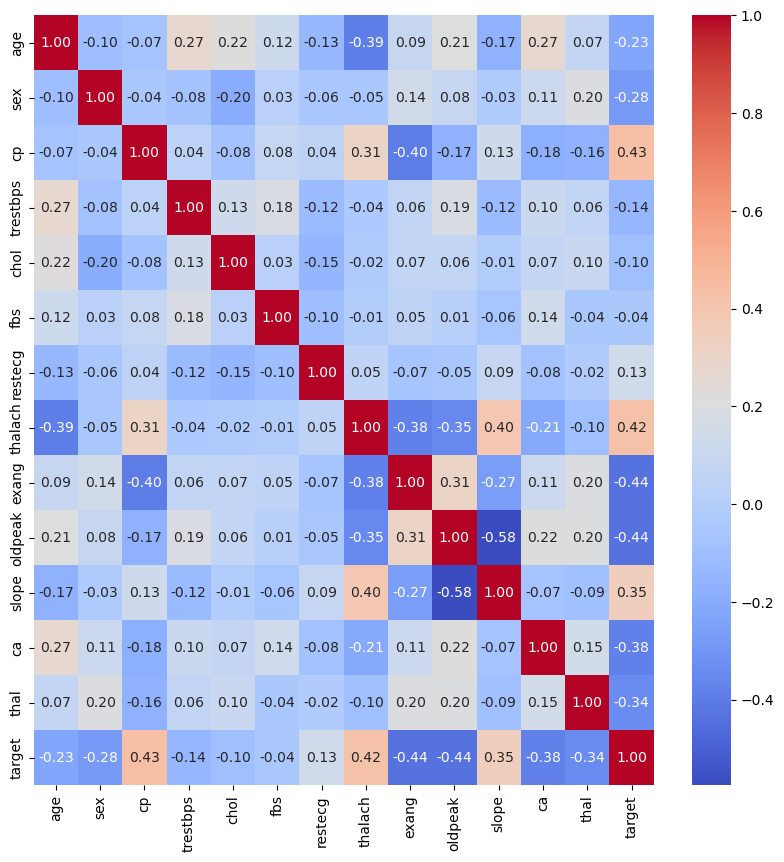

In [156]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

<Axes: >

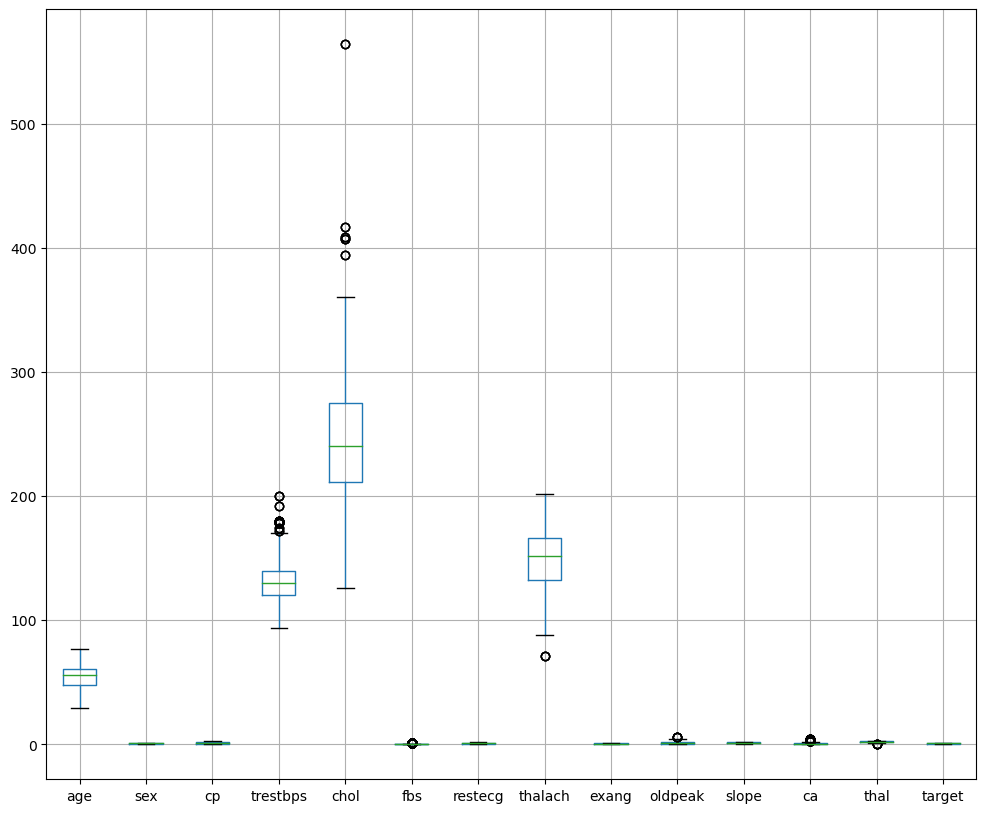

In [157]:
df.boxplot(figsize=(12,10))

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [158]:
inputs = df.iloc[::,:-1:]

target = df.target

In [159]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=80)

# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [160]:
model_dt = DecisionTreeClassifier()

In [161]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [162]:
y_pred = model_dt.predict(x_test)

In [163]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[145,   3],
       [  6, 154]], dtype=int64)

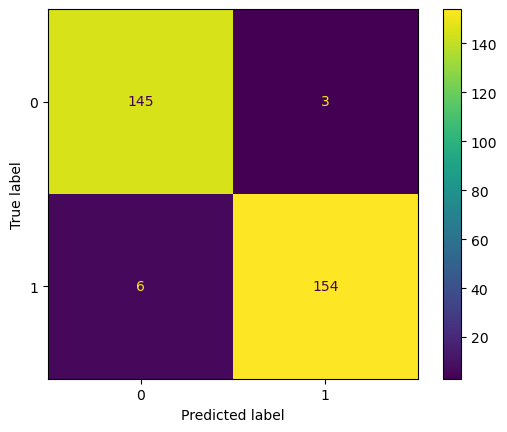

In [164]:
ConfusionMatrixDisplay.from_estimator(model_dt, x_test, y_test)

# Step 9: Evaluate Decision Tree
We evaluate the Decision Tree model using accuracy, confusion matrix, and classification report.

In [165]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# to perfrom this step we need y predict variable.

Accuracy: 0.97


In [166]:
model_dt.score(x_test, y_test)

# in this step, we dont need y predict variable. the score() method will automatically find the y predict variable and calculate the accuracy.

0.9707792207792207

# Step 10: Visualize Decision Tree
Here we visualize the structure of the trained Decision Tree.

[Text(0.4826388888888889, 0.95, 'x[2] <= 0.5\ngini = 0.5\nsamples = 717\nvalue = [351, 366]'),
 Text(0.2708333333333333, 0.85, 'x[11] <= 0.5\ngini = 0.37\nsamples = 351\nvalue = [265, 86]'),
 Text(0.1712962962962963, 0.75, 'x[12] <= 2.5\ngini = 0.5\nsamples = 152\nvalue = [77, 75]'),
 Text(0.08333333333333333, 0.65, 'x[7] <= 119.5\ngini = 0.41\nsamples = 87\nvalue = [25, 62]'),
 Text(0.06481481481481481, 0.55, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.10185185185185185, 0.55, 'x[8] <= 0.5\ngini = 0.359\nsamples = 81\nvalue = [19, 62]'),
 Text(0.037037037037037035, 0.45, 'x[4] <= 316.5\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.018518518518518517, 0.35, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(0.05555555555555555, 0.35, 'x[0] <= 61.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.037037037037037035, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.07407407407407407, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16666666666666

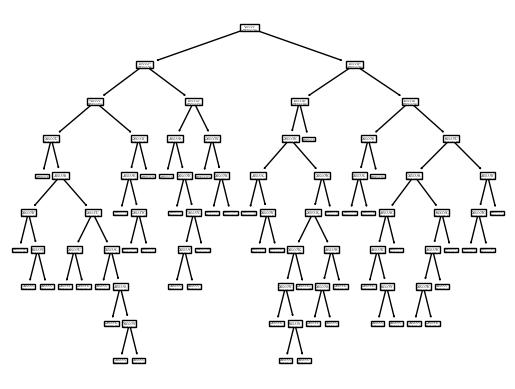

In [167]:
tree.plot_tree(model_dt)

# Step 11: Train Bagging Classifier
We train a Bagging Classifier with Decision Trees as the base model.

In [168]:
from sklearn.ensemble import BaggingClassifier

In [169]:
beg_class = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5, random_state=100)

In [170]:
beg_class.fit(x_train, y_train)

g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  random_state=100)

# Step 12: Evaluate Bagging Classifier
The Bagging model is evaluated using accuracy.

In [171]:
beg_class.score(x_test, y_test)

# whta if we didnt use score method in new beg. model
# then we have to use accuracy_score method to calculate the accuracy.
# and in this accuracy_score method we have to pass the y_test and y_predict variable.
# y_predict = beg_class.predict(x_test)
# this predict method internally take first tuple and give it to all 5 models and then take the second tuple and give it to all 5 models and so on.


0.9805194805194806

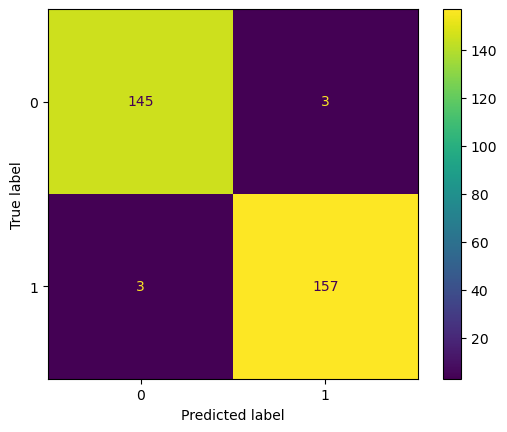

In [172]:
ConfusionMatrixDisplay.from_estimator(beg_class, x_test, y_test)

# here we decrease the missclassification rate by using bagging classifier.

# Step 13: Train Random Forest
We train a Random Forest Classifier on the dataset.

In [173]:
# what is the difference between BaggingClassifier and RandomForestClassifier?

# both are same but in begging classifier we can use any model as a base estimator but in random forest classifier we have only use decision tree as a base estimator.

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rfc = RandomForestClassifier(n_estimators=100, random_state=100)

In [176]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [177]:
y_pred_rfc = rfc.predict(x_test)

In [178]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_rfc

1.0

# Step 14: Feature Importance in Random Forest
We analyze feature importance as determined by the Random Forest model.

In [179]:
importances = rfc.feature_importances_
feature_names = rfc.feature_names_in_

In [180]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,cp,0.147748
11,ca,0.143148
9,oldpeak,0.120176
7,thalach,0.104160
0,age,0.093583
12,thal,0.087986
4,chol,0.080657
3,trestbps,0.073739
8,exang,0.054781
10,slope,0.037040


# Step 15: Evaluate Random Forest
We evaluate the Random Forest model using accuracy.

In [181]:
rfc.score(x_test, y_test)

1.0

# Step 16: Train AdaBoost Classifier
We train an AdaBoost Classifier on the dataset.

In [182]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=100, learning_rate=1.5)

# in AdaBoostClassifier we can change the base estimator for eg, knn

# Step 17: Evaluate AdaBoost Classifier
The AdaBoost model is evaluated using accuracy.

In [183]:
ada_class.fit(x_train, y_train)

g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1.5,
                   n_estimators=100, random_state=100)

In [184]:
ada_class.score(x_test, y_test)

# here we can see the accuracy is 0.76 which is less than the random forest classifier. means the accuracy is decreased. 
# it means the error rate is increased and based on bias and variance.
# when bias is high then we use bagging classifier and when variance is high then we use boosting classifier.
# we can improve the accuracy by increase the n estimators. but it doesnt necessary to work all the time.

0.9707792207792207